In [17]:
import numpy as np
import tensorflow as tf
from utils import * 
import matplotlib.pyplot as plt

In [18]:
X_train_orig, Y_train_orig, X_test_orig = load_datasets()
Y_train_orig = Y_train_orig.astype('float64')
Y_train_orig = Y_train_orig.reshape(1,len(Y_train_orig))
print(X_train_orig)
print(Y_train_orig.shape)
print(Y_train_orig)
print(X_test_orig)

[[3 1 3 ... 3 1 3]
 ['male' 'female' 'female' ... 'female' 'male' 'male']
 [22.0 38.0 26.0 ... 29.69911764705882 26.0 32.0]
 [1 1 0 ... 1 0 0]
 [0 0 0 ... 2 0 0]
 [7.25 71.2833 7.925 ... 23.45 30.0 7.75]]
(1, 891)
[[0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1.
  0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1.
  0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.
  0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0.
  1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
  1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.

In [19]:
X_train, X_test = pre_process_data(X_train_orig, X_test_orig)
print(X_train)
print(X_test)
print(X_train.shape)
print(X_test.shape)

[[0.8273772438659676 -1.5661069258891531 0.8273772438659676 ...
  0.8273772438659676 -1.5661069258891531 0.8273772438659676]
 [-0.7376951317802897 1.3555735383351184 1.3555735383351184 ...
  1.3555735383351184 -0.7376951317802897 -0.7376951317802897]
 [-0.5924805998028886 0.638789012042525 -0.2846631968415352 ...
  4.374348392294584e-15 -0.2846631968415352 0.17706290760049492]
 [0.43279336567850346 0.43279336567850346 -0.4745451962498414 ...
  0.43279336567850346 -0.4745451962498414 -0.4745451962498414]
 [-0.473673609298456 -0.473673609298456 -0.473673609298456 ...
  2.0089333664952163 -0.473673609298456 -0.473673609298456]
 [-0.5024451714361915 0.7868452935884467 -0.4888542575852478 ...
  -0.1762632390135436 -0.0443810379414236 -0.49237782784289985]]
[[0.8734819050636105 0.8734819050636105 -0.3158191904301653 ...
  0.8734819050636105 0.8734819050636105 0.8734819050636105]
 [-0.755928946018455 1.322875655532296 -0.755928946018455 ...
  -0.755928946018455 -0.755928946018455 -0.755928946

In [20]:
def initialize_parameters(dim):
    """initialize W as random of size  (dim,1) and b = 0"""
    W = np.zeros((dim,1))
    b = 0

    return W,b


In [21]:
def propagate(W,b,x,y):
    """One step of forwards propagation and calculate gradients
    Arguments : 
    W-> weights
    b -> bias
    x -> input
    y -> ground truth 
    Returns:
    grads : dict of gradients 
    cost : cost 
                
    """
    
    #number of training examples
    m = x.shape[1]    
    Z = np.dot(W.T,x) + b
    Z = Z.astype('float64')
    A = sigmoid(Z)
    cost = -np.sum(np.dot(y,np.log(A).T) + np.dot((1-y),np.log(1-A).T))/m    
    cost = np.squeeze(cost)

    #gradients 
    dW = np.dot(x,(A-y).T)/m
    db = np.sum(A-y)/m
#     print(dW.shape)
#     print(db.shape)
#     print("dW ", dW)
#     print("db ", db)

    grads = {"dW" : dW, "db" : db}
    return grads, cost
    



In [27]:
def optimize(W,b,x,y, num_iters, learning_rate):
    
    cost_history = []
    for i in range(num_iters):
        
        grads, cost = propagate(W,b,x,y)
        W = W - learning_rate*grads["dW"]
        b = b - learning_rate*grads["db"]
        cost_history.append(cost)
        
        if(i%500 == 0):
            print("cost after ", i, " iterations is ", cost)
    
    parameters = {"W" : W, "b" : b}
    
    return parameters, cost_history



In [28]:
def predict(W,b,x):
    
    m = x.shape[1]
    Z = np.dot(W.T,x) + b
    Z = Z.astype('float64')
    A = sigmoid(Z)
    
    y_pred = np.zeros((1,m))
    
    for i in range(A.shape[1]):
        if(A[0,i] <=0.5):
            y_pred[0,i] = 0
        else:
            y_pred[0,i] = 1
    
    return y_pred


In [25]:
def model(X_train , Y_train , X_test, num_iter, learning_rate, plot_cost = True):
    
    dim = X_train.shape[0]
    
    W,b = initialize_parameters(dim)
    W = W.astype('float64')
    parameters, costs = optimize(W,b,X_train, Y_train, num_iter, learning_rate)
    
    W = parameters["W"]
    b = parameters["b"]
    
    y_pred_test = predict(W,b,X_test)
    y_pred_train = predict(W,b,X_train)
    
    train_accuracy = 100 - np.mean(np.abs(y_pred_train - Y_train))*100
    print("Training Accuracy : ", train_accuracy)
    if(plot_cost):
        costs = np.squeeze(costs) 
        plt.plot(costs) 
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.show()
        
    return y_pred_test,costs



cost after  0  iterations is  0.6931471805599452
cost after  500  iterations is  0.4839241076031926
cost after  1000  iterations is  0.4561678366933778
cost after  1500  iterations is  0.44832916214045454
cost after  2000  iterations is  0.44536606910271986
cost after  2500  iterations is  0.4440498546343714
cost after  3000  iterations is  0.443401749982681
cost after  3500  iterations is  0.44305982098181323
cost after  4000  iterations is  0.44287079796648543
cost after  4500  iterations is  0.4427629619531288
cost after  5000  iterations is  0.44270013500958966
cost after  5500  iterations is  0.4426630169770552
cost after  6000  iterations is  0.44264088475820984
cost after  6500  iterations is  0.44262760750434893
cost after  7000  iterations is  0.44261961016421547
cost after  7500  iterations is  0.4426147800558754
cost after  8000  iterations is  0.4426118574912533
cost after  8500  iterations is  0.44261008689217113
cost after  9000  iterations is  0.44260901324211194
cost af

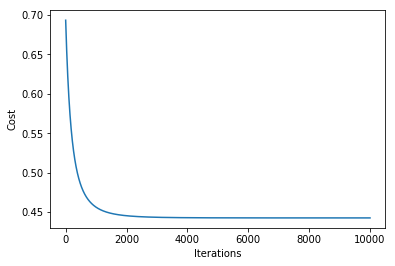

[[0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1.
  1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
  1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0.
  1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0.
  1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1.
  1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0.
  1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
  1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
  0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
  0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 

In [29]:
y_pred_test,costs = model(X_train, Y_train_orig, X_test, num_iter = 10000, learning_rate = 0.01)
print(y_pred_test)